<a href="https://colab.research.google.com/github/kaanbursa/customer_behavior/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is extension of EDA.ipynb

# Mount with Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from pandas.api.types import is_string_dtype
from shuyu import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)



# Load dataset

In [0]:
clean_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/preprocessed_train.csv')

In [5]:
clean_df.head()

,Unnamed: 0,date,customerid,employee_index,country_residence,gender,age,date_of_first_holder_contract,new_customer_index,customer_seniority,primary_or_not,customer_type_at_beginning_of_month,customer_relation_at_beginning_of_month,residence_index,foreigner_index,channel,decreased_index,address_type,province_code,province_name,active_or_not,gross_income,segmentation,saving_account,guarantees,current_accounts,derivada_accounts,payroll_accounts,junior_accounts,mas_particular_accounts,particular_accounts,particular_plus,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_plan,loans,tax,credit_card,securities,home_account,payroll,pensions,direct_debit
0,0,2015-01-28,1375586,3,2,0,35,2015-01-12,0.0,263,1.0,0,0,1,0,150,0,1.0,29.0,31,1.0,87218.10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,3,2,1,23,2012-08-10,0.0,292,1.0,0,1,1,1,147,0,1.0,13.0,16,0.0,35548.74,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,3,2,1,23,2012-08-10,0.0,292,1.0,0,1,1,0,147,0,1.0,13.0,16,0.0,122179.11,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,3,2,0,22,2012-08-10,0.0,292,1.0,0,1,1,0,146,0,1.0,50.0,51,0.0,119775.54,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,5,2015-01-28,1050615,3,2,0,23,2012-08-10,0.0,292,1.0,0,1,1,0,147,0,1.0,45.0,47,0.0,22220.04,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
clean_df.drop('Unnamed: 0',axis=1,inplace=True)

# Train test split

In [0]:
clean_df['date2'] = pd.DatetimeIndex(clean_df['date_of_first_holder_contract']).asi8
clean_df['date1'] = pd.DatetimeIndex(clean_df['date']).asi8
clean_df = clean_df.drop(['date_of_first_holder_contract','date'],axis=1)
msk = np.random.rand(len(clean_df)) < 0.8
train_df = clean_df[msk]
test_df = clean_df[~msk]

We will take 100,000 sampling from train datsset and seperate predictors and target

In [0]:
sample_df = train_df.sample(100000,random_state=1)

In [0]:
train_target = train_df['current_accounts']
predictors = train_df.drop(['saving_account', 'guarantees', 'current_accounts',
       'derivada_accounts', 'payroll_accounts', 'junior_accounts',
       'mas_particular_accounts', 'particular_accounts', 'particular_plus',
       'short_term_deposits', 'medium_term_deposits', 'long_term_deposits',
       'e_account', 'funds', 'mortgage', 'pensions_plan', 'loans', 'tax',
       'credit_card', 'securities', 'home_account', 'payroll', 'pensions',
       'direct_debit'], axis=1)


In [0]:
test_target = test_df['current_accounts']
test_predictors = test_df.drop(['saving_account', 'guarantees', 'current_accounts',
       'derivada_accounts', 'payroll_accounts', 'junior_accounts',
       'mas_particular_accounts', 'particular_accounts', 'particular_plus',
       'short_term_deposits', 'medium_term_deposits', 'long_term_deposits',
       'e_account', 'funds', 'mortgage', 'pensions_plan', 'loans', 'tax',
       'credit_card', 'securities', 'home_account', 'payroll', 'pensions',
       'direct_debit'], axis=1)




# Train Validation Split

In [0]:
# sm = SMOTE(random_state=2)
# predictors_res, target_res = sm.fit_sample(predictors, train_target)
X_train, X_val, y_train, y_val = train_test_split(predictors_res,target_res , test_size=0.2, random_state=42)


# Baseline Model with Logistic regression

In [17]:
pipe_lr = Pipeline([('scl', StandardScaler()),
         ('clf', LogisticRegression(random_state=123))])

# Fit the pipelines
pipe_lr.fit(X_train,y_train)
print(pipe_lr.score(X_train, y_train))
print(pipe_lr.score(X_val, y_val))
roc_auc_score(y_val, pipe_lr.predict(X_val))

0.6862946740303434
0.6840661956542439


0.684093647413031

# Pipeline with SVM, Decision Tree and Random Forest models

In [66]:
pipe_svm = Pipeline([('scl', StandardScaler()),
        ('clf', svm.SVC(random_state=123))])
        
pipe_tree = Pipeline([
        ('clf', tree.DecisionTreeClassifier(random_state=123))])

pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(random_state=123))])

# List of pipelines, List of pipeline names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline validation accuracy: %.3f' % (pipeline_names[index], val.score(X_val, y_val)))
    print('%s pipeline validation ROC score: %.3f' % (pipeline_names[index], roc_auc_score(y_val, val.predict(X_val))))

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=123, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
  

## RandomForest with Gridsearch

First iteration with exhaust search of all possible parameters

In [64]:
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [150],
   'clf__max_depth': [5,50,100],  
   'clf__min_samples_leaf':[5,50,100],  
   'clf__min_samples_split':[5,50,100]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            verbose=2, return_train_score = True)


# Fit using grid search
%time gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=   6.2s
[CV] clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=   6.2s
[CV] clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=   6.3s
[CV] clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=   6.3s
[CV] clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=   6.3s
[CV] clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=50, clf__n_estimators=150 
[CV]  clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=50, clf__n_estimators=150, total=   6.2s
[CV] clf__max_depth=5, clf__min_samples_leaf=5, cl

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 22.5min finished


CPU times: user 22min 42s, sys: 3.87 s, total: 22min 46s
Wall time: 22min 45s
Best accuracy: 0.810

Best params:
 {'clf__max_depth': 100, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}


Plot the ROC curve for the best model

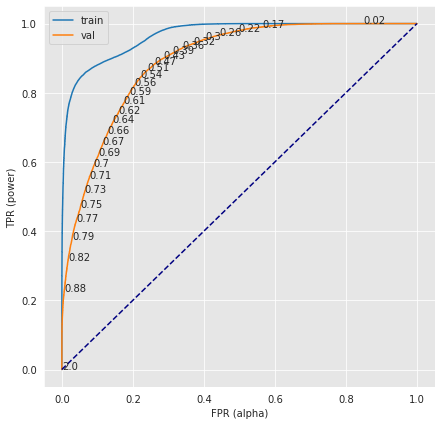

In [65]:
best_model = gs_rf.best_estimator_
scores(best_model,X_train,X_val,y_train,y_val)
roc_plot(best_model,X_train,y_train,X_val,y_val)

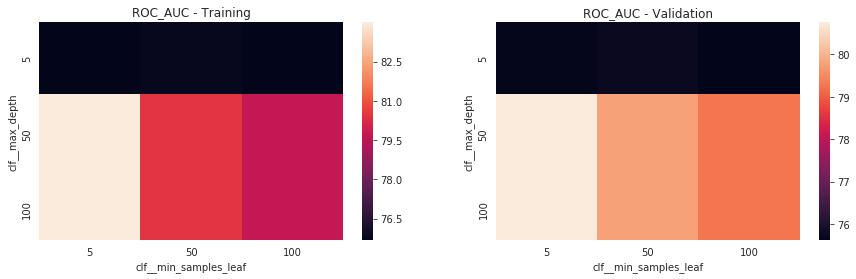

In [66]:
opt_plots(gs_rf)

Second iteration with range of parameters having best scores

In [67]:
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [150],
   'clf__max_depth': [20,40,80,100],  
   'clf__min_samples_leaf':[5,10,15,25],  
   'clf__min_samples_split':[5,25]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            verbose=2, return_train_score = True)


# Fit using grid search
%time gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  13.9s
[CV] clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s


[CV]  clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  14.0s
[CV] clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  14.0s
[CV] clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  13.6s
[CV] clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  13.2s
[CV] clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=25, clf__n_estimators=150 
[CV]  clf__max_depth=20, clf__min_samples_leaf=5, clf__min_samples_split=25, clf__n_estimators=150, total=  12.9s
[CV] clf__max_depth=20, clf__min_samples_

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 36.0min finished


CPU times: user 36min 10s, sys: 4.47 s, total: 36min 14s
Wall time: 36min 14s
Best accuracy: 0.810

Best params:
 {'clf__max_depth': 80, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}


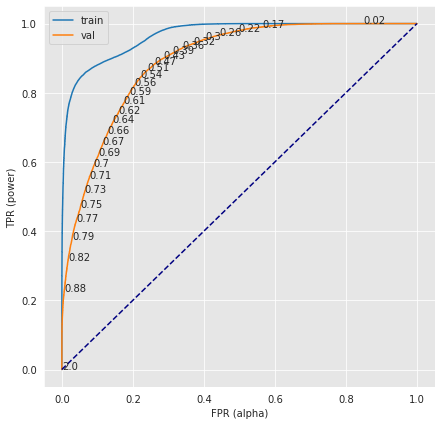

In [68]:
best_model = gs_rf.best_estimator_
scores(best_model,X_train,X_val,y_train,y_val)
roc_plot(best_model,X_train,y_train,X_val,y_val)

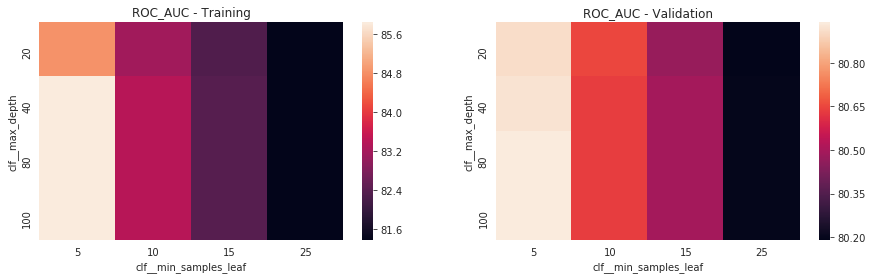

In [69]:
opt_plots(gs_rf)

Third iteration with paramerer selection on unit level

In [70]:
pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [150],
   'clf__max_depth': [55,75,80,90,100],  
   'clf__min_samples_leaf':[5,6,7],  
   'clf__min_samples_split':[5,10]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            verbose=2, return_train_score = True)


# Fit using grid search
%time gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  14.4s
[CV] clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.1s remaining:    0.0s


[CV]  clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  14.2s
[CV] clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  14.0s
[CV] clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  14.1s
[CV] clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150 
[CV]  clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=5, clf__n_estimators=150, total=  14.2s
[CV] clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=10, clf__n_estimators=150 
[CV]  clf__max_depth=55, clf__min_samples_leaf=5, clf__min_samples_split=10, clf__n_estimators=150, total=  14.0s
[CV] clf__max_depth=55, clf__min_samples_

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 37.1min finished


CPU times: user 37min 16s, sys: 4.58 s, total: 37min 21s
Wall time: 37min 20s
Best accuracy: 0.810

Best params:
 {'clf__max_depth': 55, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}


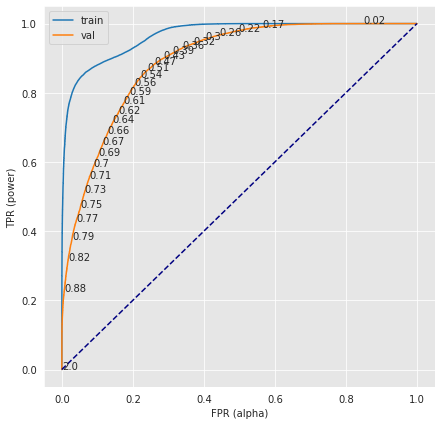

In [72]:
best_model = gs_rf.best_estimator_
scores(best_model,X_train,X_val,y_train,y_val)
roc_plot(best_model,X_train,y_train,X_val,y_val)

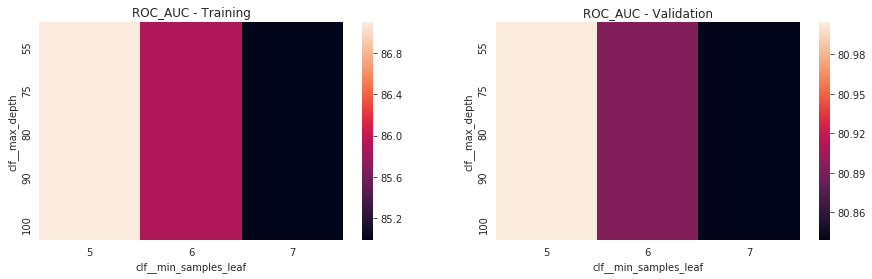

In [73]:
opt_plots(gs_rf)

## XGBoost with GridSearch

First iteration with exhaust search of all possible parameters

In [75]:
pipe_rf = Pipeline([
            ('clf', XGBClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [30, 50, 70,100,150],
   'clf__learning_rate': [1.0, 0.5, 0.1]
  }
]

# Construct grid search
gs_xgb = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',cv=3,
            verbose=2, return_train_score = True)


# Fit using grid search
%time gs_xgb.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_xgb.best_score_)
print('Best ROC: %.3f' % roc_auc_score(y_val, gs_xgb.predict(X_val)))
# Best params
print('\nBest params:\n', gs_xgb.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   1.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   1.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   1.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   1.9s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   1.9s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   2.0s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   2.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   2.8s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.4min finished


CPU times: user 2min 31s, sys: 304 ms, total: 2min 31s
Wall time: 2min 31s
Best accuracy: 0.811

Best params:
 {'clf__learning_rate': 0.5, 'clf__n_estimators': 150}


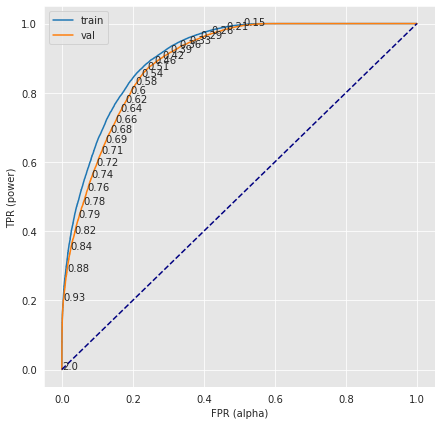

In [76]:
best_model = gs_xgb.best_estimator_
scores(best_model,X_train,X_val,y_train,y_val)
roc_plot(best_model,X_train,y_train,X_val,y_val)

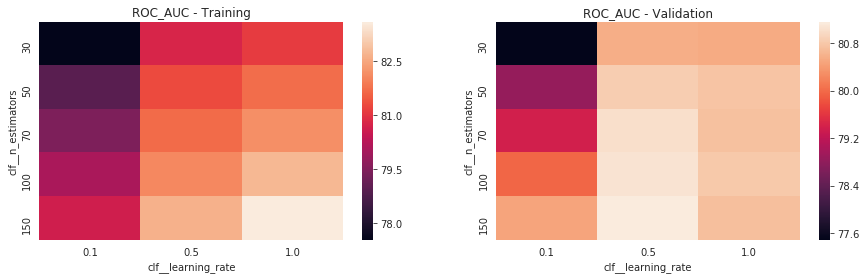

In [83]:
opt_plots_xgb(gs_xgb)

Second iteration with range of parameters having best scores

In [84]:
pipe_rf = Pipeline([
            ('clf', XGBClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [130,140,150,160,170],
   'clf__learning_rate': [0.3, 0.5, 0.7]
  }
]

# Construct grid search
gs_xgb = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',cv=3,
            verbose=2, return_train_score = True)


# Fit using grid search
%time gs_xgb.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_xgb.best_score_)
print('Best ROC: %.3f' % roc_auc_score(y_val, gs_xgb.best_params_.predict(X_val)))

# Best params
print('\nBest params:\n', gs_xgb.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__learning_rate=0.3, clf__n_estimators=130 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... clf__learning_rate=0.3, clf__n_estimators=130, total=   4.9s
[CV] clf__learning_rate=0.3, clf__n_estimators=130 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] .... clf__learning_rate=0.3, clf__n_estimators=130, total=   4.7s
[CV] clf__learning_rate=0.3, clf__n_estimators=130 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=130, total=   4.7s
[CV] clf__learning_rate=0.3, clf__n_estimators=140 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=140, total=   5.3s
[CV] clf__learning_rate=0.3, clf__n_estimators=140 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=140, total=   5.2s
[CV] clf__learning_rate=0.3, clf__n_estimators=140 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=140, total=   5.2s
[CV] clf__learning_rate=0.3, clf__n_estimators=150 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=150, total=   5.5s
[CV] clf__learning_rate=0.3, clf__n_estimators=150 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=150, total=   5.6s
[CV] clf__learning_rate=0.3, clf__n_estimators=150 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.4min finished


CPU times: user 4min 31s, sys: 507 ms, total: 4min 31s
Wall time: 4min 31s
Best accuracy: 0.812

Best params:
 {'clf__learning_rate': 0.3, 'clf__n_estimators': 170}


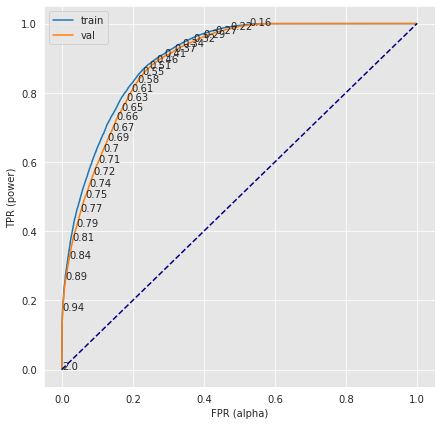

In [85]:
best_model = gs_xgb.best_estimator_
scores(best_model,X_train,X_val,y_train,y_val)
roc_plot(best_model,X_train,y_train,X_val,y_val)

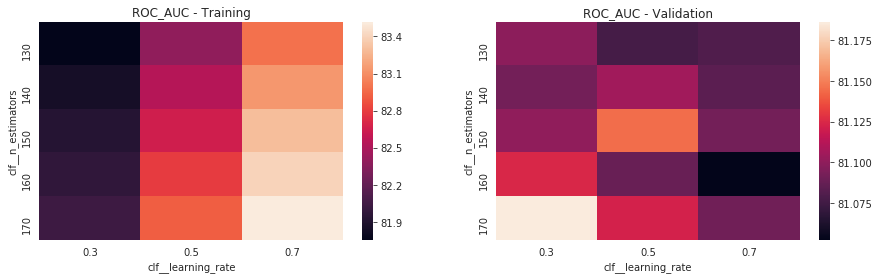

In [86]:
opt_plots_xgb(gs_xgb)

Third iteration with parameter selection on unit level

In [92]:
pipe_rf = Pipeline([
            ('clf', XGBClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [160,161,162,163,164,164,165,166,167,168,169,170],
   'clf__learning_rate': [0.3, 0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4]
  }
]

# Construct grid search
gs_xgb = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',cv=3,
            verbose=2, return_train_score = True)


# Fit using grid search
%time gs_xgb.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_xgb.best_score_)

# Best params
print('\nBest params:\n', gs_xgb.best_params_)


Fitting 3 folds for each of 132 candidates, totalling 396 fits
[CV] clf__learning_rate=0.3, clf__n_estimators=160 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... clf__learning_rate=0.3, clf__n_estimators=160, total=   5.7s
[CV] clf__learning_rate=0.3, clf__n_estimators=160 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] .... clf__learning_rate=0.3, clf__n_estimators=160, total=   5.7s
[CV] clf__learning_rate=0.3, clf__n_estimators=160 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=160, total=   5.7s
[CV] clf__learning_rate=0.3, clf__n_estimators=161 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=161, total=   5.9s
[CV] clf__learning_rate=0.3, clf__n_estimators=161 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=161, total=   5.7s
[CV] clf__learning_rate=0.3, clf__n_estimators=161 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=161, total=   5.8s
[CV] clf__learning_rate=0.3, clf__n_estimators=162 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=162, total=   5.7s
[CV] clf__learning_rate=0.3, clf__n_estimators=162 ...................
[CV] .... clf__learning_rate=0.3, clf__n_estimators=162, total=   6.0s
[CV] clf__learning_rate=0.3, clf__n_estimators=162 ...................
[CV] .

[Parallel(n_jobs=1)]: Done 396 out of 396 | elapsed: 40.2min finished


CPU times: user 40min 18s, sys: 4.17 s, total: 40min 22s
Wall time: 40min 22s
Best accuracy: 0.813

Best params:
 {'clf__learning_rate': 0.34, 'clf__n_estimators': 166}


In [96]:
print('Best ROC: %.3f' % roc_auc_score(y_val, gs_xgb.predict(X_val)))


Best ROC: 0.813


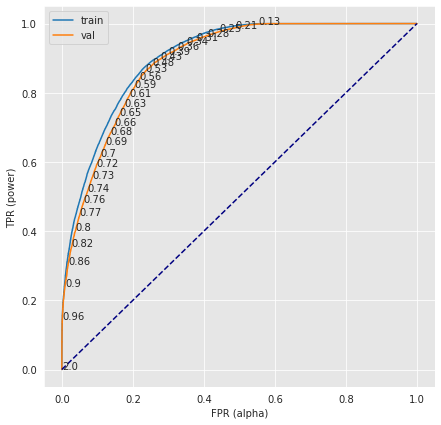

In [97]:
best_model = gs_xgb.best_estimator_
scores(best_model,X_train,X_val,y_train,y_val)
roc_plot(best_model,X_train,y_train,X_val,y_val)

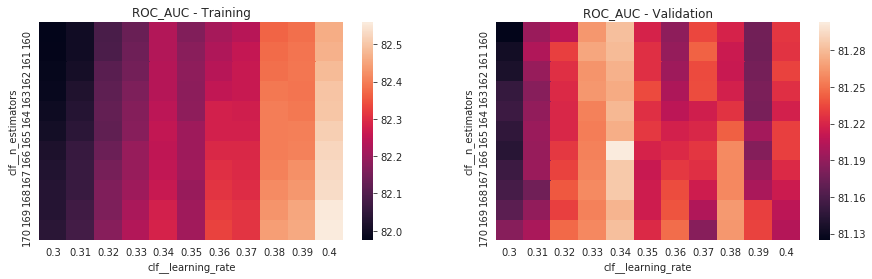

In [98]:
opt_plots_xgb(gs_xgb)

# Plot Confusion matrix with best model

Confusion matrix, without normalization
[[ 3756  3054]
 [ 1525 11665]]
Normalized confusion matrix
[[0.55154185 0.44845815]
 [0.11561789 0.88438211]]


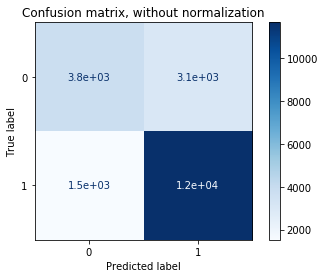

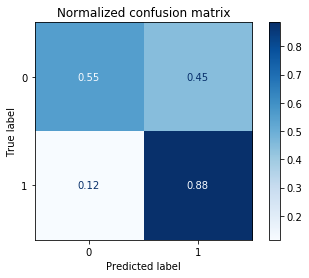

In [45]:
conf_mat (gs_xgb,X_val,y_val)

In [11]:
gs_xgb = XGBClassifier(learning_rate=0.34,n_estimators=166)
gs_xgb.fit(X_train,y_train)

print(roc_auc_score(y_train, gs_xgb.predict(X_train)))
print(roc_auc_score(y_val, gs_xgb.predict(X_val)))
print(accuracy_score(y_train, gs_xgb.predict(X_train)))
print(accuracy_score(y_val, gs_xgb.predict(X_val)))

[21:28:13] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.8134290812831992
0.8133409735928407
0.8134324301107142
0.8133274696889431


# Run model without SMOTE 

In [49]:
gs_xgb = XGBClassifier(learning_rate=0.34,n_estimators=166)
gs_xgb.fit(X_train,y_train)

print(roc_auc_score(y_train, gs_xgb.predict(X_train)))
print(roc_auc_score(y_val, gs_xgb.predict(X_val)))
print(accuracy_score(y_train, gs_xgb.predict(X_train)))
print(accuracy_score(y_val, gs_xgb.predict(X_val)))

0.7159767989331479
0.7136021704691068
0.770025
0.769


# Find best threshhold

In [21]:
np.array(gs_xgb.predict_proba(X_train))

array([[1.8533111e-01, 8.1466889e-01],
       [3.7542611e-01, 6.2457389e-01],
       [9.9980313e-01, 1.9685195e-04],
       ...,
       [9.9995190e-01, 4.8101083e-05],
       [9.9998319e-01, 1.6794938e-05],
       [9.9318320e-01, 6.8168007e-03]], dtype=float32)

From our confusion matrix above and our business knowledge, we can calculate our prevelance = 0.49946, CostFP-CostTN=8, CostFN-CostTp=10

In [0]:
best_thresh = threshold_selection(0.49946, 8, 10, y_train, np.array(gs_xgb.predict_proba(X_train)[:,-1]))

In [23]:
best_thresh

0.49146605

# Model Prediction

In [0]:
test_pre = gs_xgb.predict_proba(test_predictors.values.tolist())

In [0]:
predictions = predictor(gs_xgb,best_thresh,test_predictors.values.tolist())

In [31]:
print(roc_auc_score(test_target.values.tolist(), predictions))
print(accuracy_score(test_target.values.tolist(), predictions))

0.7071655960452171
0.7618198417613488


Confusion matrix, without normalization
[[ 401589  340367]
 [ 169182 1247753]]
Normalized confusion matrix
[[0.54125716 0.45874284]
 [0.11939997 0.88060003]]


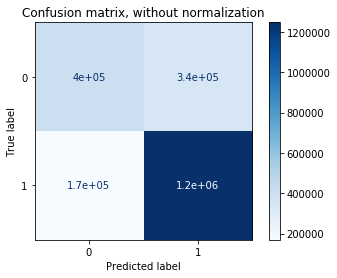

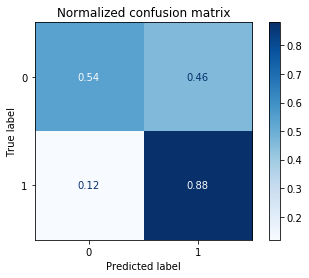

In [46]:
conf_mat (gs_xgb,test_predictors,test_target)

# Conclusion

For the model it is clear that when we use SMOTE for creating synthetic data our model performs better on training set. Since we only have 70% to 30% class imbalance which is 70% percent has current accounts where 30 does not. Our model's True Positive rate is much better than True Negative. Which is desireble in our context where we want to show ads to people who would like the product but the cost of showing to uninterested is not huge.